In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
from pandas.tseries.frequencies import to_offset
dates = pd.date_range("2000-01-01", periods=12, freq="T")
ts = pd.Series(np.arange(len(dates)), index=dates)
ts

C:\Users\dell\AppData\Local\Temp\ipykernel_13044\92468136.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  dates = pd.date_range("2000-01-01", periods=12, freq="T")


2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: min, dtype: int64

In [3]:
result = ts.resample("5min", closed="right", label="right").sum()
result.index = result.index + to_offset("-1s")
result

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5min, dtype: int64

In [4]:
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index=dates)
ts.resample("5min").ohlc()

,open,high,low,close
2000-01-01 00:00:00,5,11,3,4
2000-01-01 00:05:00,2,9,0,9
2000-01-01 00:10:00,10,10,7,7


In [5]:
frame = pd.DataFrame(np.random.standard_normal((2, 4)),
                     index=pd.date_range("2000-01-01", periods=2,
                                         freq="W-WED"),
                     columns=["Colorado", "Texas", "New York", "Ohio"])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.087963,0.638689,-0.869976,-0.634197
2000-01-12,1.007462,-0.539426,0.331777,0.878999


In [6]:
df_daily = frame.resample("D").asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.087963,0.638689,-0.869976,-0.634197
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.007462,-0.539426,0.331777,0.878999


In [7]:
frame.resample("D").ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.087963,0.638689,-0.869976,-0.634197
2000-01-06,-0.087963,0.638689,-0.869976,-0.634197
2000-01-07,-0.087963,0.638689,-0.869976,-0.634197
2000-01-08,-0.087963,0.638689,-0.869976,-0.634197
2000-01-09,-0.087963,0.638689,-0.869976,-0.634197
2000-01-10,-0.087963,0.638689,-0.869976,-0.634197
2000-01-11,-0.087963,0.638689,-0.869976,-0.634197
2000-01-12,1.007462,-0.539426,0.331777,0.878999


In [8]:
frame.resample("D").ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.087963,0.638689,-0.869976,-0.634197
2000-01-06,-0.087963,0.638689,-0.869976,-0.634197
2000-01-07,-0.087963,0.638689,-0.869976,-0.634197
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.007462,-0.539426,0.331777,0.878999


In [9]:
frame.resample("W-THU").ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.087963,0.638689,-0.869976,-0.634197
2000-01-13,1.007462,-0.539426,0.331777,0.878999


In [10]:
frame = pd.DataFrame(np.random.standard_normal((24, 4)),
                     index=pd.period_range("1-2000", "12-2001",
                                           freq="M"),
                     columns=["Colorado", "Texas", "New York", "Ohio"])
frame.head()
annual_frame = frame.resample("A-DEC").mean()
annual_frame

C:\Users\dell\AppData\Local\Temp\ipykernel_13044\2743538330.py:6: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  annual_frame = frame.resample("A-DEC").mean()
C:\Users\dell\AppData\Local\Temp\ipykernel_13044\2743538330.py:6: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame = frame.resample("A-DEC").mean()


,Colorado,Texas,New York,Ohio
2000,-0.199350,-0.435148,0.307933,-0.027154
2001,-0.143751,-0.126455,-0.120065,0.025172


In [11]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample("Q-DEC").ffill()
annual_frame.resample("Q-DEC", convention="end").asfreq()

C:\Users\dell\AppData\Local\Temp\ipykernel_13044\162139083.py:2: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC").ffill()
C:\Users\dell\AppData\Local\Temp\ipykernel_13044\162139083.py:3: FutureWarning: The 'convention' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast PeriodIndex to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC", convention="end").asfreq()
C:\Users\dell\AppData\Local\Temp\ipykernel_13044\162139083.py:3: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC", convention="end").asfreq()


,Colorado,Texas,New York,Ohio
2000Q4,-0.199350,-0.435148,0.307933,-0.027154
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,-0.143751,-0.126455,-0.120065,0.025172


In [12]:
annual_frame.resample("Q-MAR").ffill()

C:\Users\dell\AppData\Local\Temp\ipykernel_13044\70909838.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-MAR").ffill()


,Colorado,Texas,New York,Ohio
2000Q4,-0.199350,-0.435148,0.307933,-0.027154
2001Q1,-0.199350,-0.435148,0.307933,-0.027154
2001Q2,-0.199350,-0.435148,0.307933,-0.027154
2001Q3,-0.199350,-0.435148,0.307933,-0.027154
2001Q4,-0.143751,-0.126455,-0.120065,0.025172
2002Q1,-0.143751,-0.126455,-0.120065,0.025172
2002Q2,-0.143751,-0.126455,-0.120065,0.025172
2002Q3,-0.143751,-0.126455,-0.120065,0.025172


In [13]:
N = 15
times = pd.date_range("2017-05-20 00:00", freq="1min", periods=N)
df = pd.DataFrame({"time": times,
                   "value": np.arange(N)})
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [14]:
df.set_index("time").resample("5min").count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [15]:
df2 = pd.DataFrame({"time": times.repeat(3),
                    "key": np.tile(["a", "b", "c"], N),
                    "value": np.arange(N * 3.)})
df2.head(7)

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0


In [16]:
time_key = pd.Grouper(freq="5min")

In [17]:
resampled = (df2.set_index("time")
             .groupby(["key", time_key])
             .sum())
resampled
resampled.reset_index()

,key,time,value
0,a,2017-05-20 00:00:00,30.0
1,a,2017-05-20 00:05:00,105.0
2,a,2017-05-20 00:10:00,180.0
3,b,2017-05-20 00:00:00,35.0
4,b,2017-05-20 00:05:00,110.0
5,b,2017-05-20 00:10:00,185.0
6,c,2017-05-20 00:00:00,40.0
7,c,2017-05-20 00:05:00,115.0
8,c,2017-05-20 00:10:00,190.0


In [18]:
close_px_all = pd.read_csv("stock_px.csv",
                           parse_dates=True, index_col=0)
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]
close_px = close_px.resample("B").ffill()

<Axes: >

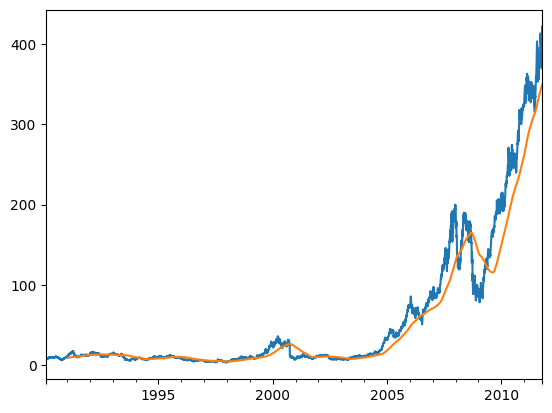

In [19]:
close_px["AAPL"].plot()
close_px["AAPL"].rolling(250).mean().plot()

<Axes: >

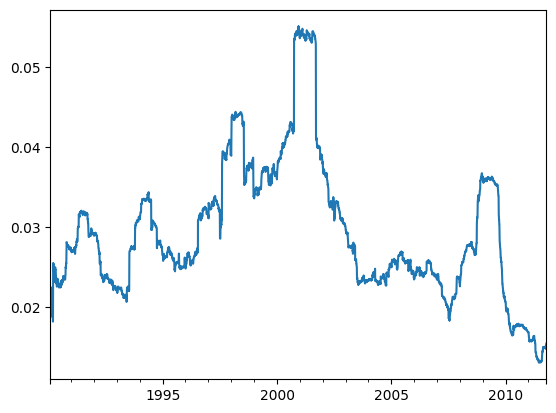

In [20]:
plt.figure()
std250 = close_px["AAPL"].pct_change().rolling(250, min_periods=10).std()
std250[5:12]
std250.plot()

In [21]:
expanding_mean = std250.expanding().mean()

In [22]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Axes: >

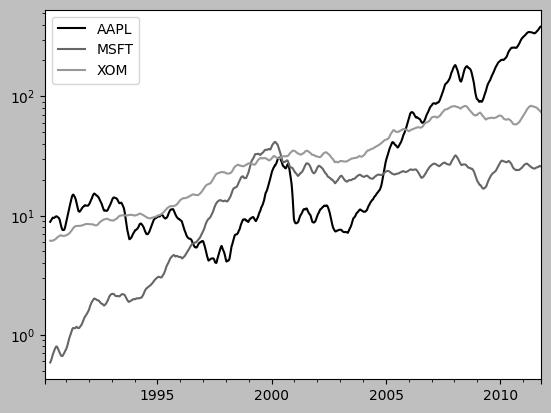

In [23]:
plt.style.use('grayscale')
close_px.rolling(60).mean().plot(logy=True)

In [24]:
close_px.rolling("20D").mean()

,AAPL,MSFT,XOM
1990-02-01,7.860000,0.510000,6.120000
1990-02-02,7.930000,0.510000,6.180000
1990-02-05,8.013333,0.510000,6.203333
1990-02-06,8.040000,0.510000,6.210000
1990-02-07,7.986000,0.510000,6.234000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


In [25]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

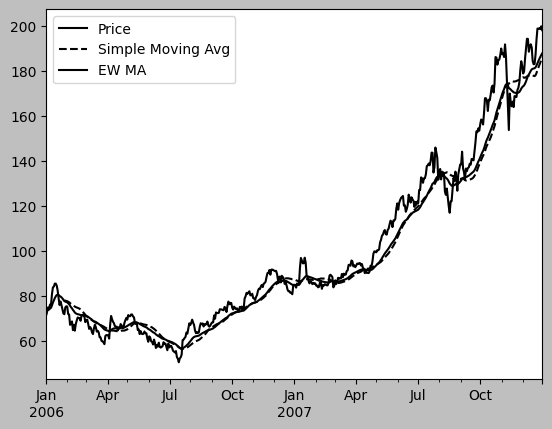

In [26]:
aapl_px = close_px["AAPL"]["2006":"2007"]

ma30 = aapl_px.rolling(30, min_periods=20).mean()
ewma30 = aapl_px.ewm(span=30).mean()

aapl_px.plot(style="k-", label="Price")
ma30.plot(style="k--", label="Simple Moving Avg")
ewma30.plot(style="k-", label="EW MA")
plt.legend()

In [27]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [28]:
spx_px = close_px_all["SPX"]
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

<Axes: >

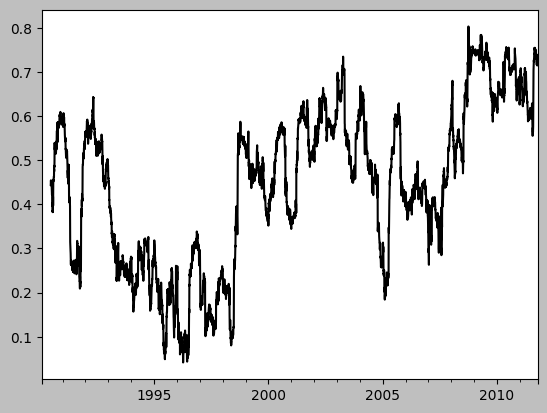

In [29]:
corr = returns["AAPL"].rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [30]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Axes: >

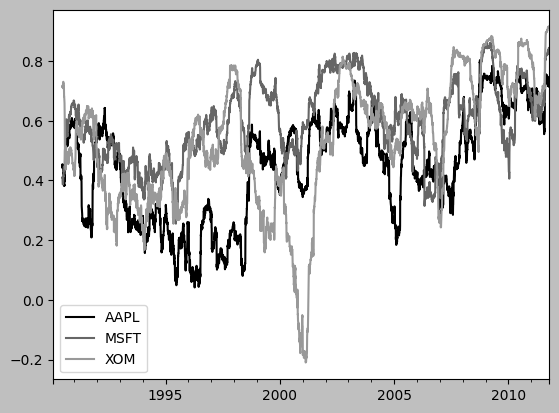

In [31]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [32]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Axes: >

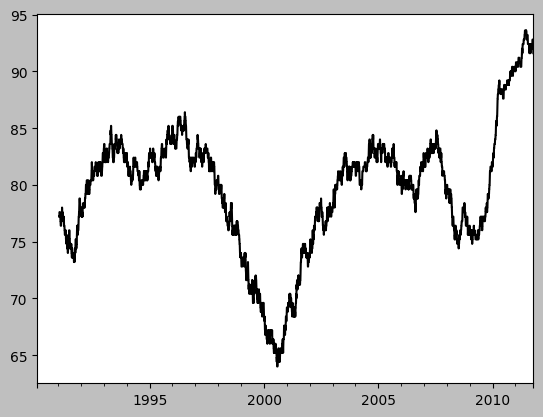

In [33]:
from scipy.stats import percentileofscore
def score_at_2percent(x):
    return percentileofscore(x, 0.02)

result = returns["AAPL"].rolling(250).apply(score_at_2percent)
result.plot()